# Bias plot computation


The code reproduces the bias plot reported in the paper: "Beamforming design for minimizing the signal power estimation error", E. Ollila, Xavier Mestre, and Elias Raninen, IEEE Transactions on Signal Processing, 2025,  conditionally accepted.

Date: Nov. 24, 2025

In [1]:
import numpy as np
SNRdb = np.array([0,10,20])
gammas = 10**(SNRdb/10) # sigma^2 = 1 (noise power is unity for simplicity)

In [2]:
def sind(degrees):
    return np.sin(np.deg2rad(degrees))

def steering_vector(m_elems,angle_deg):        
    return np.exp(-1j*np.pi*np.arange(m_elems).reshape(-1,1) * sind(angle_deg))

In [3]:
M = 20 # number of array elements
theta0 = np.array([20.0]) # the look direction of the SOI
a = steering_vector(M,theta0) # steering vector of the SOI

In [4]:
def compute_bias(gamma,theta,a):
    # compute the bias of the Capon beamformer for the given power, gamma, and angle, theta, of the interfering signal
    M = a.shape[0]
    a_theta = steering_vector(M,theta) # steering vector of the interfering signal
    cor = np.abs(np.conj(a.T) @ a_theta)**2 # correlation between the steering vectors
    num = 1+gamma*M
    denom = M*(1+M*gamma) - cor * gamma
    return (num/denom).item() # bias

theta_min=0
theta_max=35
thetas = np.arange(theta_min,theta_max+0.1,0.1)
def compute_biases(gammas,thetas=thetas,a=a):
    # compute the biases over a range of angles and powers
    M = a.shape[0]
    bias = np.zeros((len(thetas),len(gammas)))
    for i,theta in enumerate(thetas):
        a_theta = steering_vector(M,theta)
        cor = np.abs(np.conj(a.T) @ a_theta)**2
        for j,gamma in enumerate(gammas):
            num = 1+gamma*M
            denom = M*(1+M*gamma) - cor * gamma
            bias[i,j] = (num / denom).item()
    return bias,thetas

Mlist  = [10,20] # the list of array sizes to study
a = steering_vector(Mlist[0],theta0)
bias_0,thetas = compute_biases(gammas,thetas=thetas,a=a)
a = steering_vector(Mlist[1],theta0)
bias_1,_ = compute_biases(gammas,thetas=thetas,a=a)

In [5]:
theta = 90
a_theta = steering_vector(Mlist[0],theta)
a = steering_vector(Mlist[0],theta0)
gamma = gammas[-1]
Q = a_theta @ np.conj(a_theta.T)*gamma + np.eye(Mlist[0])
invQ = np.linalg.inv(Q)
b2 = 1./np.real(a.conj().T @ invQ @ a)

# another way to compute the bias (as reported in the paper):
b1 = compute_bias(gamma,theta,a)


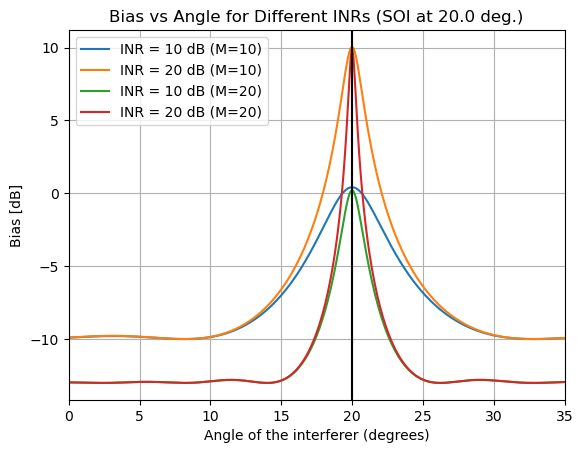

In [6]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(thetas,10*np.log10(bias_0[:,0]),label=f'INR = 10 dB (M={Mlist[0]})')
plt.plot(thetas,10*np.log10(bias_0[:,1]),label=f'INR = 20 dB (M={Mlist[0]})')
plt.plot(thetas,10*np.log10(bias_1[:,0]),label=f'INR = 10 dB (M={Mlist[1]})')
plt.plot(thetas,10*np.log10(bias_1[:,1]),label=f'INR = 20 dB (M={Mlist[1]})')
plt.axvline(x=theta0.item(),color='k') #linestyle='--') #label='SOI Direction')
plt.xlabel('Angle of the interferer (degrees)')
plt.ylabel('Bias [dB]')
plt.title(f'Bias vs Angle for Different INRs (SOI at {theta0.item()} deg.)')
plt.legend()
plt.xlim([0,theta_max])
plt.grid()
plt.show()